In [1]:
from src.dataset import FinancialDataset, DataHandler
from src.trainer_new import PortfolioTrainer
from src.markowitz import MaxSharpe
from src.models import NN_Sharpe
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
%load_ext autoreload
%autoreload 2

# Propre

## Extracting Mean and Cov

In [3]:
financial_dataset = FinancialDataset(tickers=["MC.PA", "GLD"], synthetic=True, n_simul=2000, n_synthetic=700)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed
/usr/local/lib/python3.12/site-packages/src/dataset.py:95: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change().dropna()


In [4]:
returns = financial_dataset._raw_data['returns'].values

mean_th = returns.mean(axis=0)
cov_th = np.cov(returns, rowvar=False)

In [5]:
returns

array([[ 0.03657717,  0.01140826],
       [ 0.01575299, -0.00810721],
       [-0.00496281, -0.0186567 ],
       ...,
       [ 0.01520799, -0.00362914],
       [ 0.01746028,  0.00364236],
       [ 0.00058497,  0.00765518]], shape=(3830, 2))

In [6]:
mean_th

array([0.00074067, 0.00036746])

## Test avec 2 actifs et matrice de cov plein de 0

In [7]:
cov_th = np.array([[ 1e-8, 1e-8],
       [1e-8,  1e-8]])

In [8]:
financial_dataset = FinancialDataset(tickers=["MC.PA", "GLD"], synthetic=True, n_simul=10, n_synthetic=1000, mean=mean_th, cov=cov_th)

[*********************100%***********************]  2 of 2 completed
/usr/local/lib/python3.12/site-packages/src/dataset.py:95: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change().dropna()


In [9]:
returns = financial_dataset._raw_data['returns'].values

mean_th = returns.mean(axis=0)
mean_th

array([0.00074067, 0.00036746])

In [10]:
data_handler = DataHandler(
    dataset=financial_dataset,
    initial_train_years=1,
    retrain_years=1,
    rolling_window=100,
    batch_size=5,
    overlap=False,
    shuffle=True,
    on_synthetic=True
)

trainer = PortfolioTrainer(
    model=NN_Sharpe(input_size=data_handler.n_assets,
                    hidden_size=10,
                    num_layers=3,
                    
                    output_size=data_handler.n_assets,
                    temperature=0.1),
    
    data_handler=data_handler,
    device='cpu',
    epochs=2,
    lr=0.01,
    weight_decay=0,
    permute_assets=False
)

/usr/local/lib/python3.12/site-packages/src/markowitz.py:98: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4413.)
  risk    = torch.sqrt(weights.T@cov_matrix@weights + 1e-8)


In [11]:
data_handler.dataset.cov

array([[1.e-08, 1.e-08],
       [1.e-08, 1.e-08]])

In [13]:
trainer.train(compute_marko_weights=['sharpe_torch' , 'marko_torch'])

Training period from 101 to 353
Investment period from 353 to 605


100%|██████████| 2/2 [01:13<00:00, 36.69s/it]


-7306.193400065104
torch.Size([2520, 100, 2])
2016 8 605 353


100%|██████████| 8/8 [00:00<00:00, 7530.17it/s]


Training period from 353 to 605
Investment period from 605 to 857


100%|██████████| 2/2 [00:00<00:00,  2.76it/s]


-7338.706787109375
torch.Size([2520, 100, 2])
2016 8 857 605


100%|██████████| 8/8 [00:00<00:00, 6220.70it/s]


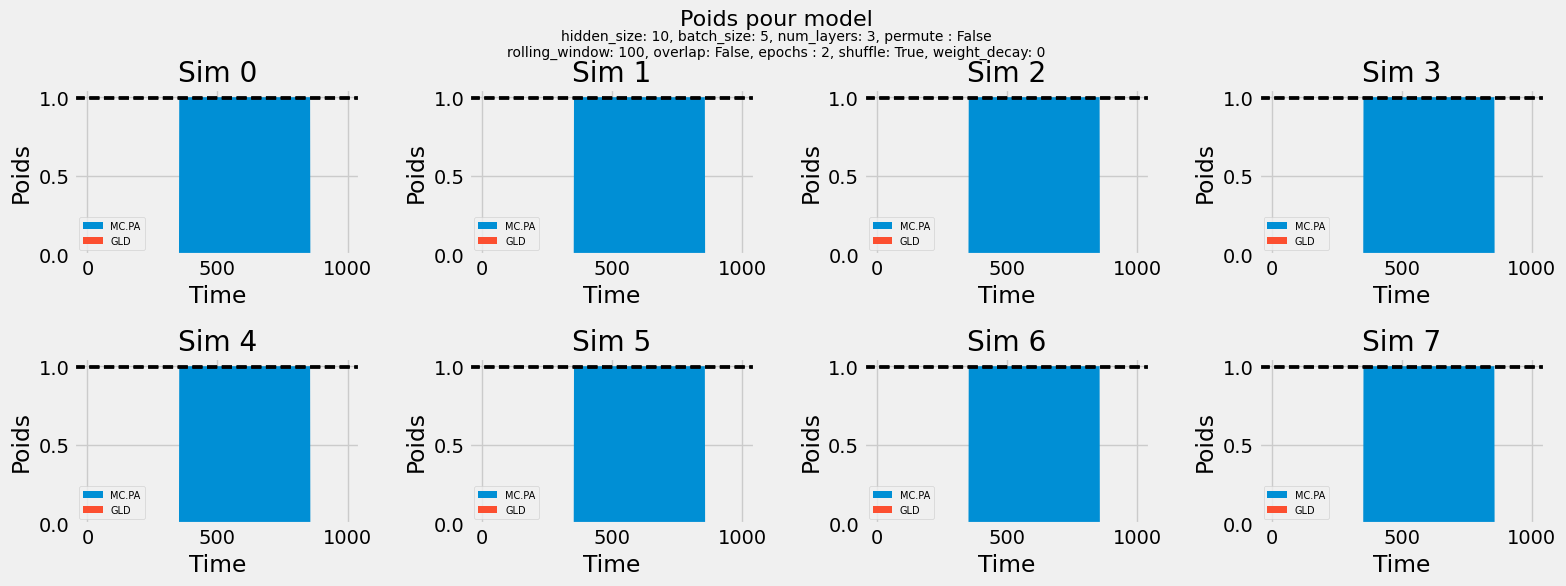

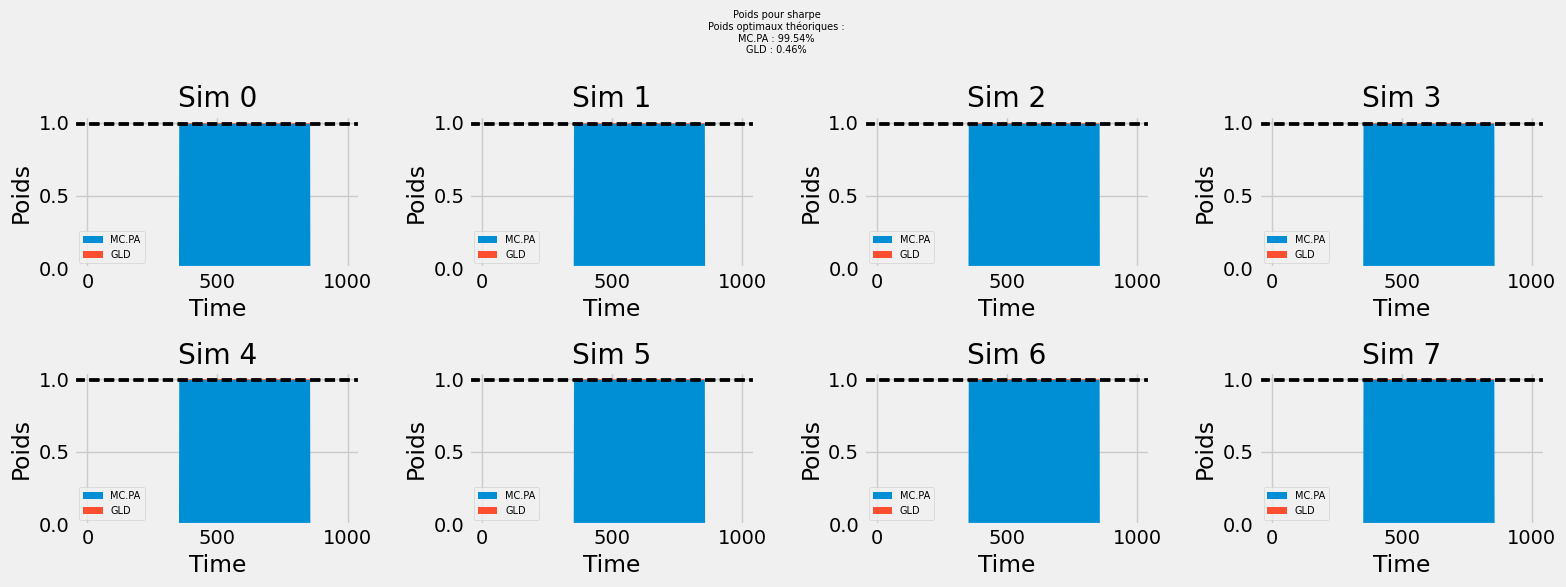

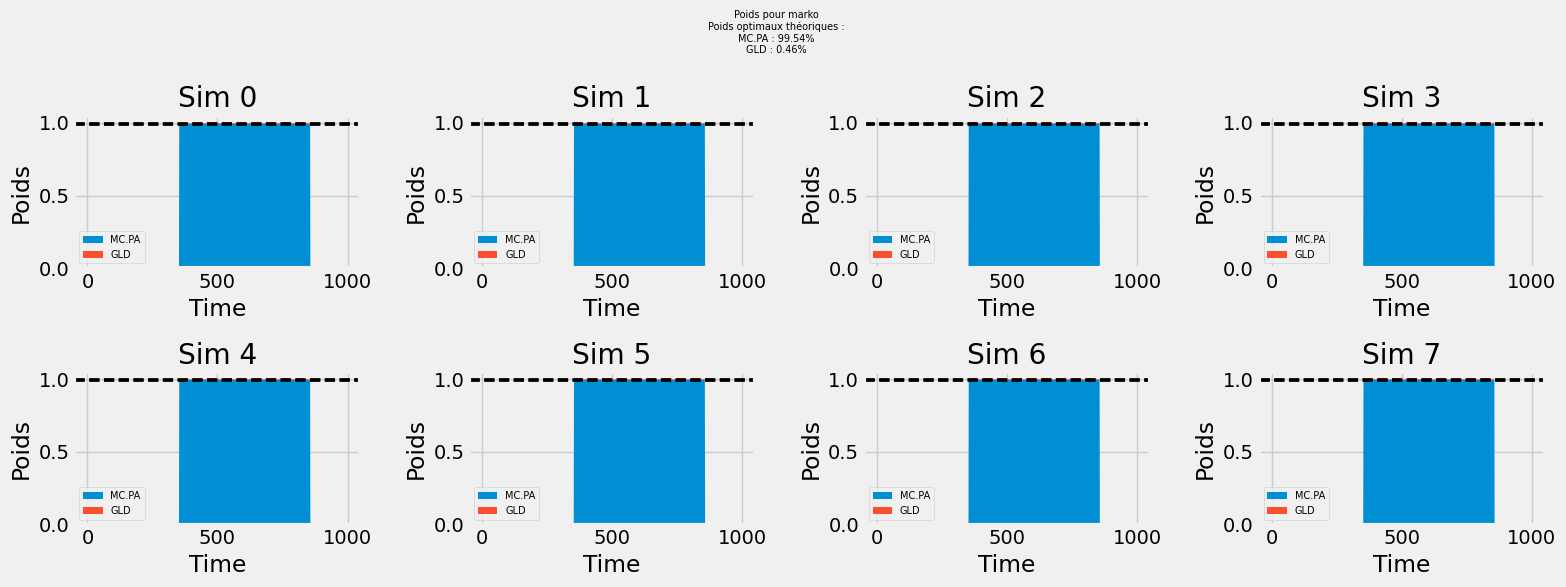

In [14]:
trainer.plot_weights(type_w='model', th_weights='sharpe')
trainer.plot_weights(type_w='sharpe', th_weights='sharpe')
trainer.plot_weights(type_w='marko', th_weights='marko')

In [12]:
data_handler.dataset.mean

array([0.00074067, 0.00036746])

## Test avec 3 actifs et matrice de cov 0,0,0

## Extracting Mean and Cov

In [ ]:
financial_dataset = FinancialDataset(tickers=["XOM", "MC.PA", "GLD"], synthetic=True, n_simul=2000, n_synthetic=700)

[*********************100%***********************]  3 of 3 completed
/usr/local/lib/python3.12/site-packages/src/dataset.py:95: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change().dropna()


In [ ]:
returns = financial_dataset._raw_data['returns'].values

mean_th = returns.mean(axis=0)
cov_th = np.cov(returns, rowvar=False)

In [ ]:
cov_th

array([[2.72214679e-04, 1.07528549e-04, 1.97845579e-05],
       [1.07528549e-04, 3.27935534e-04, 5.10176143e-06],
       [1.97845579e-05, 5.10176143e-06, 1.32588068e-04]])

In [ ]:
cov_th = np.array([[ 1e-8,  1e-8,  1e-8],
       [ 1e-8,  1e-8, 1e-8],
       [ 1e-8, 1e-8,  1e-8]])

In [32]:
financial_dataset = FinancialDataset(tickers=["XOM", "MC.PA", "GLD"], synthetic=True, n_simul=10, n_synthetic=1000, mean=mean_th, cov=cov_th)

[*********************100%***********************]  3 of 3 completed
/usr/local/lib/python3.12/site-packages/src/dataset.py:95: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change().dropna()


In [33]:
data_handler = DataHandler(
    dataset=financial_dataset,
    initial_train_years=1,
    retrain_years=1,
    rolling_window=100,
    batch_size=5,
    overlap=False,
    shuffle=True,
    on_synthetic=True
)

trainer = PortfolioTrainer(
    model=NN_Sharpe(input_size=data_handler.n_assets,
                    hidden_size=10,
                    num_layers=3,
                    
                    output_size=data_handler.n_assets,
                    temperature=0.1),
    
    data_handler=data_handler,
    device='cpu',
    epochs=2,
    lr=0.01,
    weight_decay=0,
    permute_assets=False
)

In [34]:
trainer.train(compute_marko_weights=['sharpe_torch', 'marko_torch'])

Training period from 101 to 353
Investment period from 353 to 605


100%|██████████| 2/2 [00:00<00:00,  2.68it/s]


-3829.634246826172
torch.Size([2520, 100, 3])
2016 8 605 353


  1%|          | 23/2016 [00:27<39:54,  1.20s/it]

100%|██████████| 8/8 [00:00<00:00, 10817.03it/s]


Training period from 353 to 605
Investment period from 605 to 857


100%|██████████| 2/2 [02:13<00:00, 66.98s/it]


-7356.7989501953125
torch.Size([2520, 100, 3])
2016 8 857 605


100%|██████████| 8/8 [00:00<00:00, 4085.03it/s]


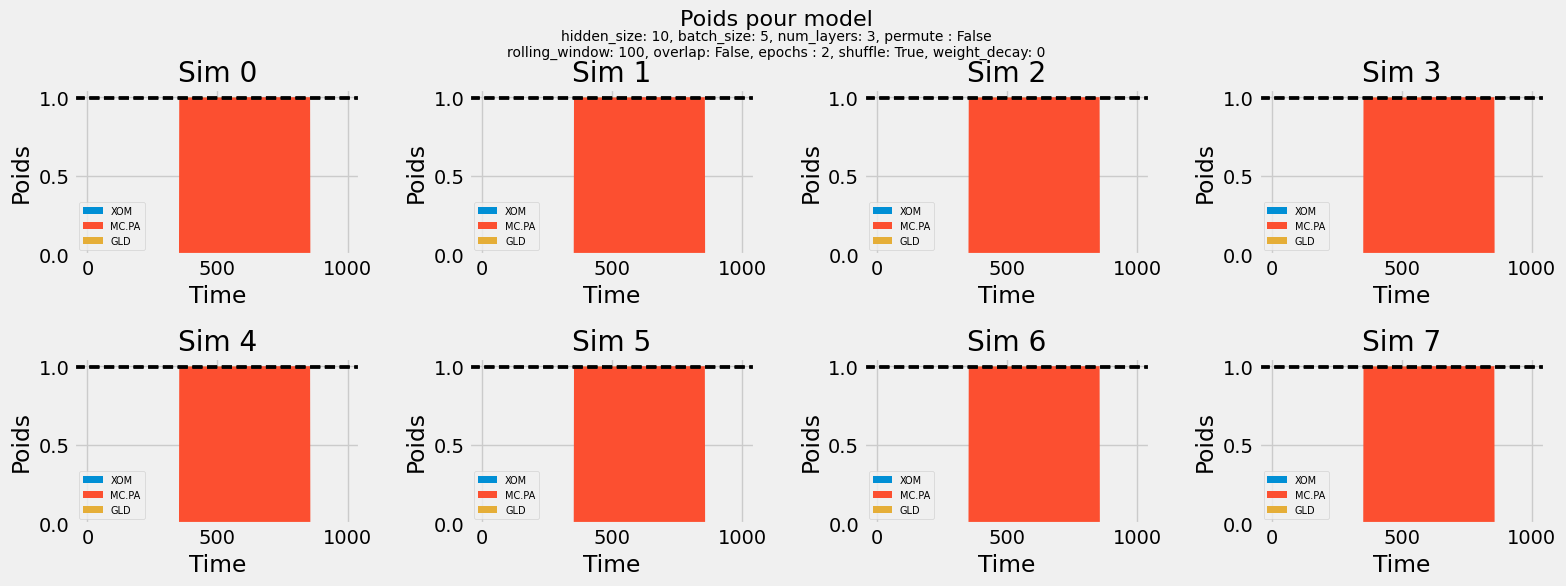

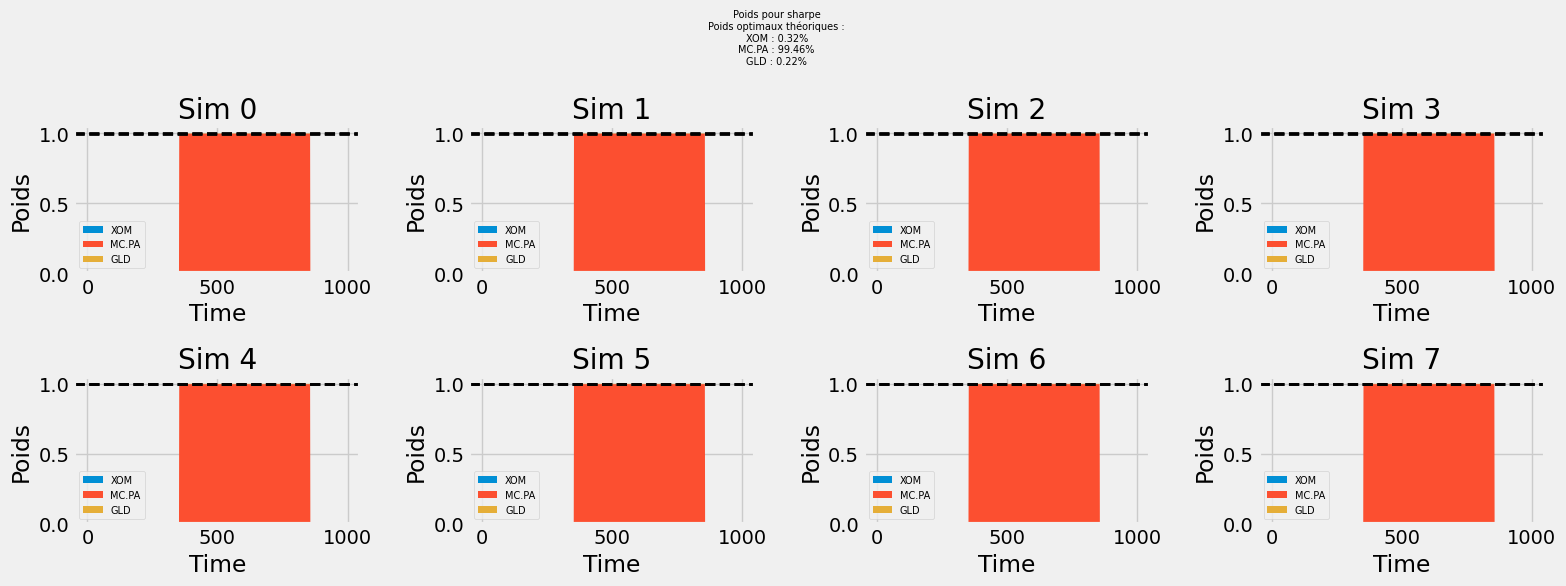

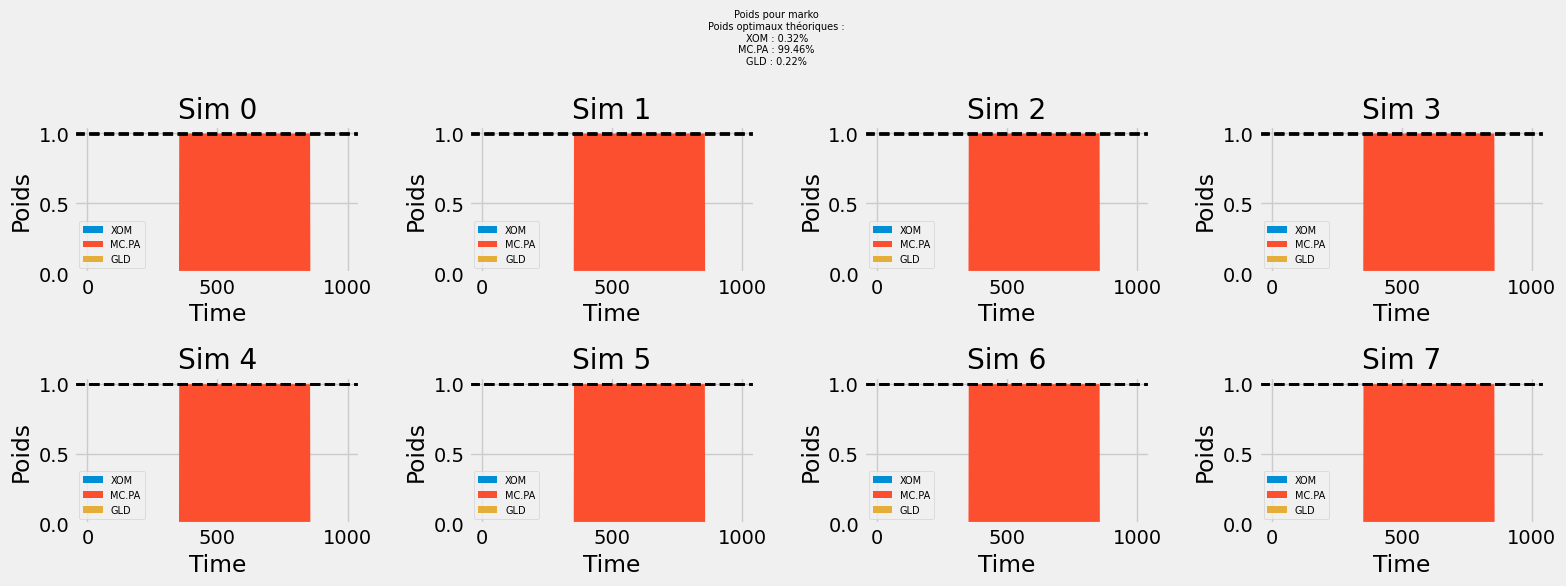

In [36]:
trainer.plot_weights(type_w='model', th_weights='sharpe')
trainer.plot_weights(type_w='sharpe', th_weights='sharpe')
trainer.plot_weights(type_w='marko', th_weights='marko')

In [15]:
financial_dataset = FinancialDataset(tickers=["XOM", "MC.PA", "GLD", "AIR.PA"], synthetic=True, n_simul=10, n_synthetic=1000)

[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.12/site-packages/src/dataset.py:95: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change().dropna()


In [16]:
returns = financial_dataset._raw_data['returns'].values

mean_th = returns.mean(axis=0)
cov_th = np.cov(returns, rowvar=False)

In [17]:
cov_th = np.full((4, 4), 1e-8)

In [18]:
financial_dataset = FinancialDataset(tickers=["XOM", "MC.PA", "GLD", "AIR.PA"], synthetic=True, n_simul=10, n_synthetic=1000, mean=mean_th, cov=cov_th)

[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.12/site-packages/src/dataset.py:95: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change().dropna()


In [19]:
data_handler = DataHandler(
    dataset=financial_dataset,
    initial_train_years=1,
    retrain_years=1,
    rolling_window=100,
    batch_size=5,
    overlap=False,
    shuffle=True,
    on_synthetic=True
)

trainer = PortfolioTrainer(
    model=NN_Sharpe(input_size=data_handler.n_assets,
                    hidden_size=10,
                    num_layers=3,
                    
                    output_size=data_handler.n_assets,
                    temperature=0.1),
    
    data_handler=data_handler,
    device='cpu',
    epochs=2,
    lr=0.01,
    weight_decay=0,
    permute_assets=False
)

In [20]:
trainer.train(compute_marko_weights=['sharpe_torch', 'marko_torch'])

Training period from 101 to 353
Investment period from 353 to 605


100%|██████████| 2/2 [00:28<00:00, 14.19s/it]


-7389.7986246744795
torch.Size([2520, 100, 4])
2016 8 605 353


100%|██████████| 8/8 [00:00<00:00, 11088.71it/s]


Training period from 353 to 605
Investment period from 605 to 857


100%|██████████| 2/2 [00:24<00:00, 12.27s/it]


-7236.8084716796875
torch.Size([2520, 100, 4])
2016 8 857 605


100%|██████████| 8/8 [00:00<00:00, 6007.96it/s]


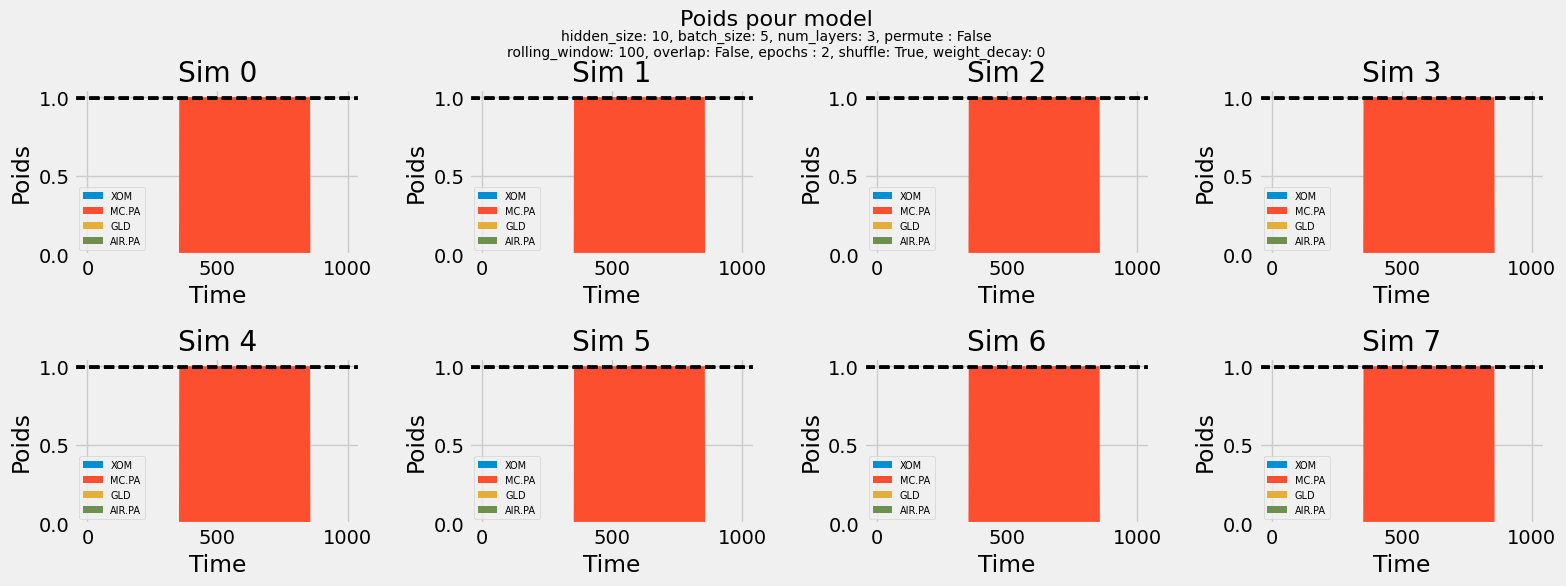

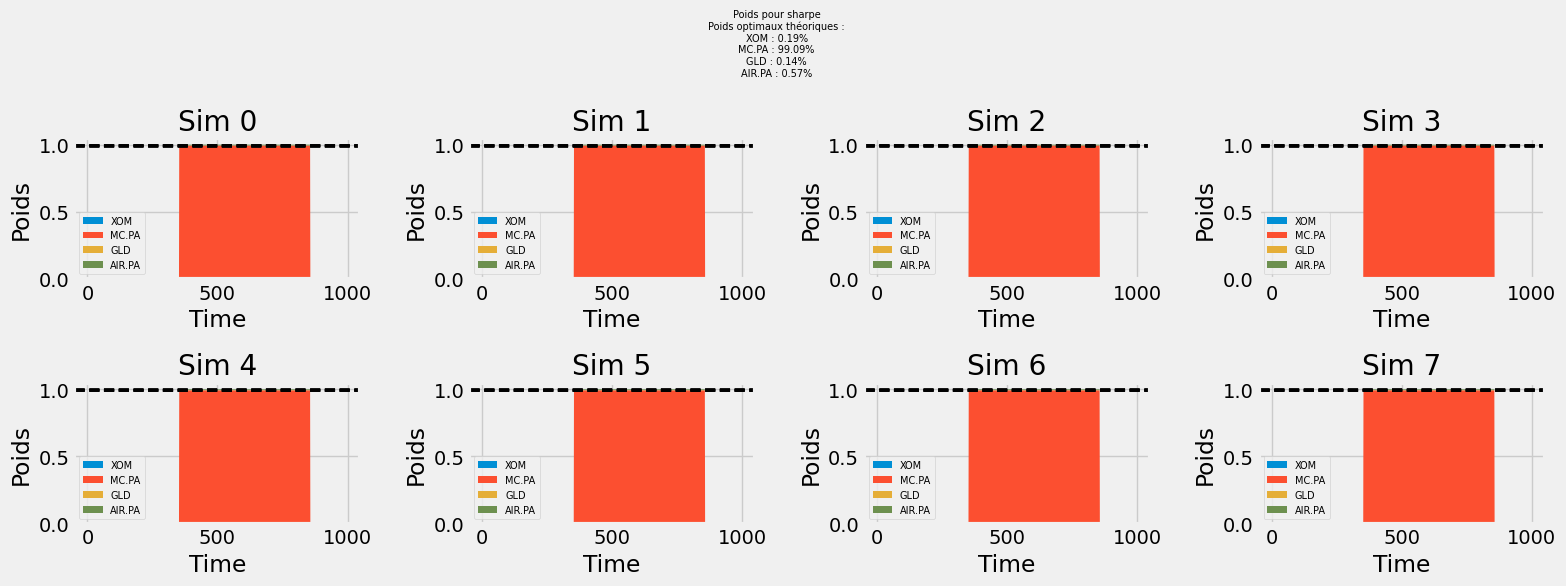

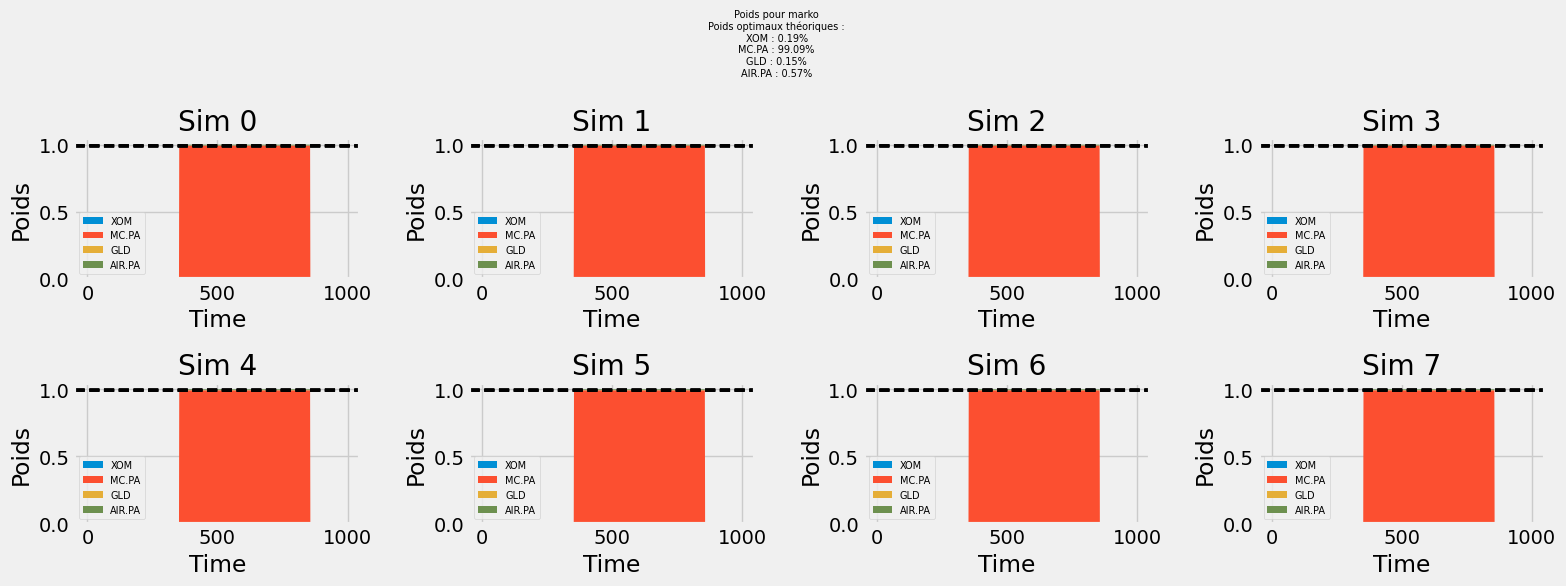

In [21]:
trainer.plot_weights(type_w='model', th_weights='sharpe')
trainer.plot_weights(type_w='sharpe', th_weights='sharpe')
trainer.plot_weights(type_w='marko', th_weights='marko')

In [22]:
mean_th

array([0.00016223, 0.00074067, 0.00036746, 0.00063112])